In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

## Get the SSA Names Dataset

In [2]:
!wget https://raw.githubusercontent.com/hackerb9/ssa-baby-names/main/allnames.txt
# !wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

--2024-11-14 00:52:59--  https://raw.githubusercontent.com/hackerb9/ssa-baby-names/main/allnames.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Connection: keep-alive
  Content-Length: 755579
  Cache-Control: max-age=300
  Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
  Content-Type: text/plain; charset=utf-8
  ETag: "b06a1ba212a75eff405945c5b2aa15b23a3125a7a0dd7b58133b24fd1dbfd47d"
  Strict-Transport-Security: max-age=31536000
  X-Content-Type-Options: nosniff
  X-Frame-Options: deny
  X-XSS-Protection: 1; mode=block
  X-GitHub-Request-Id: 9689:E56CD:1F45C:27140:6734FC8D
  Accept-Ranges: bytes
  Date: Wed, 13 Nov 2024 19:22:54 GMT
  Via: 1.1 varnish
  X-S

In [2]:
words = open('allnames.txt').read().lower().splitlines()
# words = open('names.txt').read().lower().splitlines()
words[:20]

['linda',
 'james',
 'michael',
 'robert',
 'john',
 'david',
 'mary',
 'william',
 'jennifer',
 'lisa',
 'christopher',
 'richard',
 'mark',
 'patricia',
 'jessica',
 'jason',
 'ashley',
 'deborah',
 'debra',
 'matthew']

#### Analysis

In [90]:
min(len(w) for w in words)

2

In [91]:
max(len(w) for w in words)

15

In [6]:
bigrams = {}

for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    bigrams[bigram] = bigrams.get(bigram, 0) + 1
    print(f'{ch1} {ch2}')

. l
l i
i n
n d
d a
a .
. j
j a
a m
m e
e s
s .
. m
m i
i c
c h
h a
a e
e l
l .
. r
r o
o b
b e
e r
r t
t .
. j
j o
o h
h n
n .
. d
d a
a v
v i
i d
d .
. m
m a
a r
r y
y .
. w
w i
i l
l l
l i
i a
a m
m .
. j
j e
e n
n n
n i
i f
f e
e r
r .
. l
l i
i s
s a
a .
. c
c h
h r
r i
i s
s t
t o
o p
p h
h e
e r
r .
. r
r i
i c
c h
h a
a r
r d
d .
. m
m a
a r
r k
k .
. p
p a
a t
t r
r i
i c
c i
i a
a .
. j
j e
e s
s s
s i
i c
c a
a .
. j
j a
a s
s o
o n
n .
. a
a s
s h
h l
l e
e y
y .
. d
d e
e b
b o
o r
r a
a h
h .
. d
d e
e b
b r
r a
a .
. m
m a
a t
t t
t h
h e
e w
w .
. b
b a
a r
r b
b a
a r
r a
a .
. t
t h
h o
o m
m a
a s
s .
. s
s u
u s
s a
a n
n .
. j
j o
o s
s h
h u
u a
a .
. s
s h
h i
i r
r l
l e
e y
y .
. a
a m
m a
a n
n d
d a
a .
. c
c h
h a
a r
r l
l e
e s
s .
. k
k a
a r
r e
e n
n .
. d
d o
o r
r o
o t
t h
h y
y .
. c
c y
y n
n t
t h
h i
i a
a .
. g
g a
a r
r y
y .
. d
d a
a n
n i
i e
e l
l .
. s
s t
t e
e v
v e
e n
n .
. b
b e
e t
t t
t y
y .
. b
b r
r i
i t
t t
t a
a n
n y
y .
. d


KeyboardInterrupt: 

In [5]:
sorted(bigrams.items(), key = lambda kv: -kv[1])

[(('a', '.'), 28953),
 (('a', 'n'), 17138),
 (('n', '.'), 16094),
 (('e', '.'), 15492),
 (('a', 'r'), 11352),
 (('.', 'a'), 10765),
 (('e', 'l'), 10141),
 (('r', 'i'), 10094),
 (('h', 'a'), 9962),
 (('n', 'a'), 9947),
 (('i', 'a'), 9033),
 (('l', 'e'), 8744),
 (('o', 'n'), 8462),
 (('s', 'h'), 8310),
 (('e', 'n'), 8259),
 (('l', 'a'), 8244),
 (('.', 's'), 8133),
 (('m', 'a'), 8047),
 (('.', 'j'), 8003),
 (('r', 'a'), 7786),
 (('.', 'm'), 7728),
 (('.', 'k'), 7610),
 (('a', 'l'), 7586),
 (('e', 'r'), 7329),
 (('n', 'e'), 7239),
 (('i', 'n'), 6931),
 (('l', 'i'), 6880),
 (('.', 'd'), 6697),
 (('.', 't'), 6369),
 (('r', 'e'), 6189),
 (('a', 'h'), 6092),
 (('n', 'n'), 5986),
 (('h', '.'), 5983),
 (('n', 'i'), 5974),
 (('.', 'l'), 5870),
 (('.', 'c'), 5821),
 (('t', 'a'), 5687),
 (('y', 'a'), 5575),
 (('i', '.'), 5492),
 (('i', 'e'), 5474),
 (('y', '.'), 5372),
 (('d', 'a'), 5277),
 (('i', 's'), 5186),
 (('j', 'a'), 5103),
 (('a', 'y'), 5012),
 (('k', 'a'), 4906),
 (('d', 'e'), 4836),
 (('l

## Bigram Model

> A Bigram Model will simply use the context of the current word to generate the next word

> For that, we need to obtain the occurunces of pairs of each characters, create a frequency lookup map

> Use a Multinomial Distribution to choose characters iteratively

#### Store the Bigrams

> We would store the Bigrams in a 2-D array, where the rows are going to be the first element/character of the Bigram & the colums are going to be the second element/character of the Bigram

> Each entry in the 2-D array will tell us how often the second element/character follows the first one

In [6]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [8]:
chars = sorted(list(set(''.join(words))))

##### Lookup Tables

In [9]:
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [10]:
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    # print(f'{ch1} {ch2}')

##### Visualize the 2D Array

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

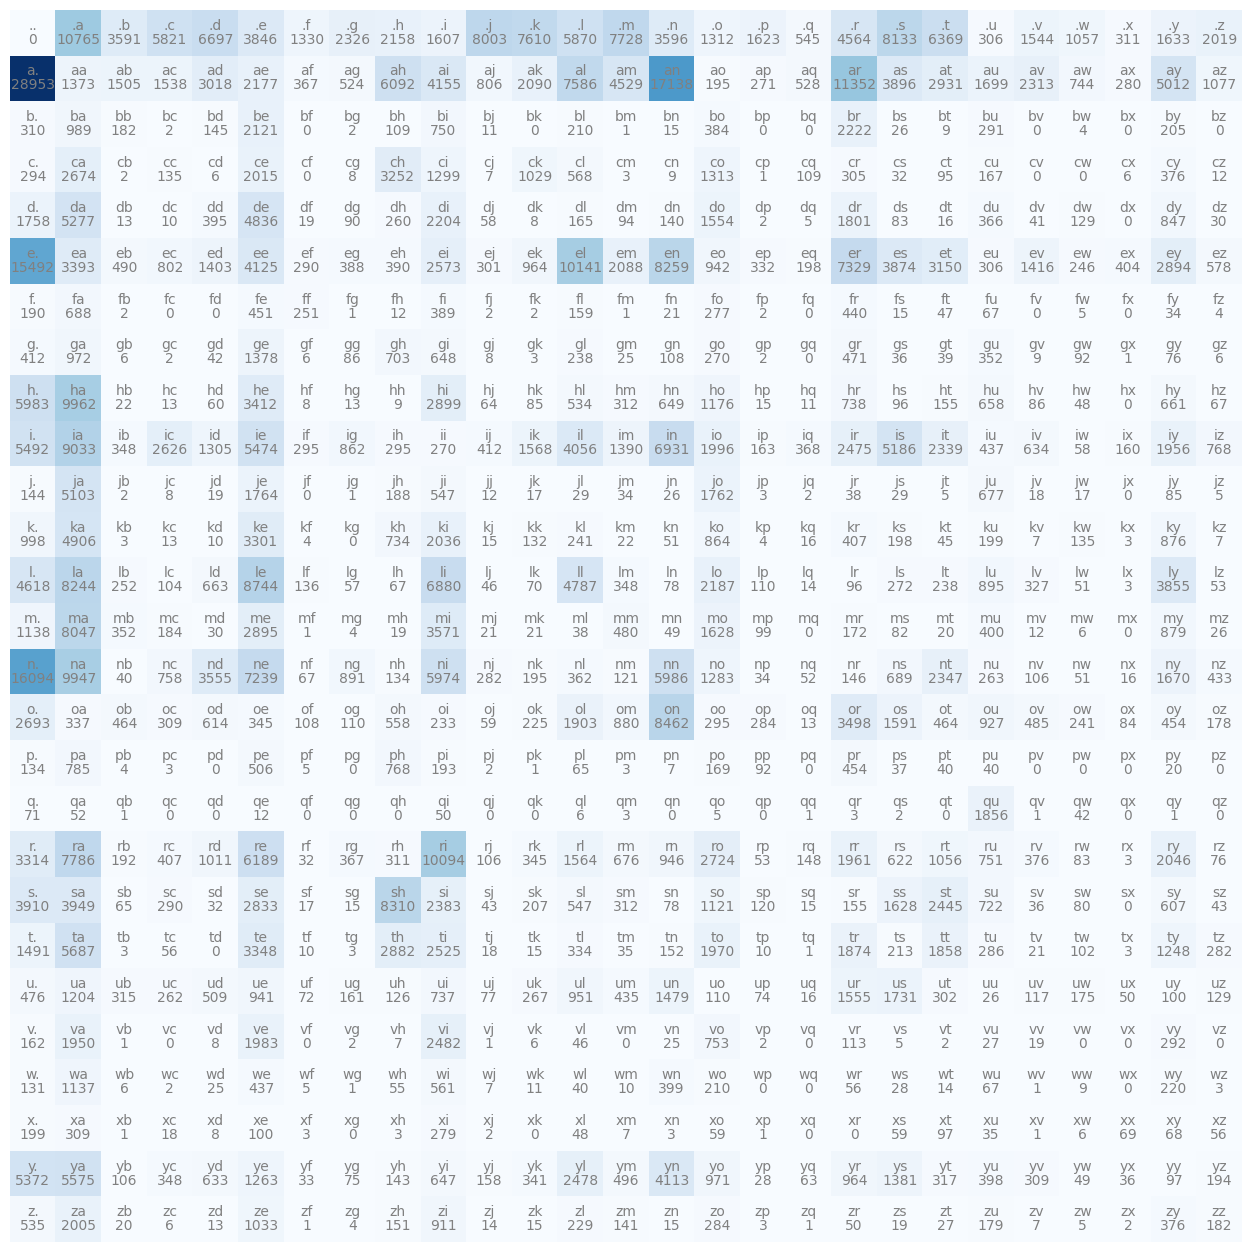

In [11]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
  for j in range(27):
    ch_str = itos[i] + itos[j]
    plt.text(j, i, ch_str, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')

#### Sample the Characters

> We need to create a probability vector of each rows i.e. How likely is the next character to be `.` or `a` or `b` or so on

> We need to normalise the counts to get a probablity distribution

In [99]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1073, 0.0358, 0.0580, 0.0667, 0.0383, 0.0133, 0.0232, 0.0215,
        0.0160, 0.0797, 0.0758, 0.0585, 0.0770, 0.0358, 0.0131, 0.0162, 0.0054,
        0.0455, 0.0810, 0.0635, 0.0030, 0.0154, 0.0105, 0.0031, 0.0163, 0.0201])

##### Multinomial Function to return a sample using a probability distribution

In [100]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'j'

In [101]:
# Normalise the Tensor

P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [102]:
P.shape

torch.Size([27, 27])

In [103]:
idx = 0
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
  out = []
  while True:
    p = P[idx]

    idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # print(itos[idx])
    out.append(itos[idx])
    if idx == 0:
      break

  print(''.join(out))

junide.
janaqah.
p.
clay.
a.


#### Evaluate the Model

> Likelihood is difficult to work with as it will generate very small numbers (since the entire Tensor is normalised)

> Instead we work on the Log Likelihood, which converts the product into sums, hence making it easier to work with i.e. `log(a*b*c*...) = a+b+c+...`

> A Log Likelihood of `0` menas that the model is performing good & the more `-ve` we get, the performance decreases


> But a Loss Function tells us that minimum is better. So, we take Negative Log Likelihood instead

1. GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
2. equivalent to maximizing the log likelihood (because log is monotonic)
3. equivalent to minimizing the negative log likelihood
4. equivalent to minimizing the average negative log likelihood

In [104]:
log_likelihood = 0.0
n = 0

# for word in words[:3]:
# for word in words:
for word in ["bishwajeet"]:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    idx = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx, idx2]
    logprob = torch.log(prob)
    log_likelihood += logprob

    n += 1
    # print(f'{ch1} {ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')

print(f'Avg NLL = {negative_log_likelihood/n}')

log_likelihood=tensor(-32.3596)
negative_log_likelihood=tensor(32.3596)
Avg NLL = 2.9417855739593506


## The Neural Network Framework

#### Create the Training set of all the Bigrams

In [117]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    print(ch1, ch2)

    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. l
l i
i n
n d
d a
a .


In [118]:
xs

tensor([ 0, 12,  9, 14,  4,  1])

In [119]:
ys

tensor([12,  9, 14,  4,  1,  0])

#### One Hot Enconding

> If we just feed in these index values to the Neural Network, nothing useful is going to happen

> What we do instead is pass the One Hot Encoded version of these indices

> One Hot Encoding of a number is a vector where every index is 0 except of the integer index we are trying to encode, which we turn to a 1

In [120]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

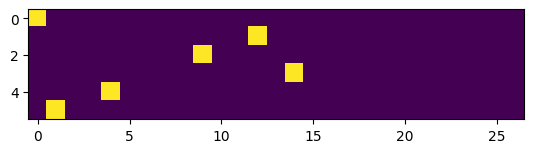

In [121]:
plt.imshow(xenc)

#### The NN

##### Handling the Weights

> Randomly initialise 27 neurons' weights, each neuron will have 27 inputs

In [122]:
g = torch.Generator().manual_seed(2147483647)     # Change the seed to resample
W = torch.randn((27, 27), generator=g, requires_grad=True)

##### Forward Pass

In [123]:
"""
>> Now we need to determine what is the output of the neural network (Layer 1)
>> It can't be a count of numbers
>> Nor it can be the probability of occurance (as the sum isn't 0 nor are they in range [0,1])

>> So, what we do is that we take "Log of Count", and exponentiate it
>> And this can be interpreted analogous to counts (as we did in Bigram Count Matrix)

>> BASICALLY, WE DO THE SOFTMAX ACTIVATION FUNCTION ON THE LOG OF COUNTS
"""

'\n>> Now we need to determine what is the output of the neural network (Layer 1)\n>> It can\'t be a count of numbers\n>> Nor it can be the probability of occurance (as the sum isn\'t 0 nor are they in range [0,1])\n\n>> So, what we do is that we take "Log of Count", and exponentiate it\n>> And this can be interpreted analogous to counts (as we did in Bigram Count Matrix)\n\n>> BASICALLY, WE DO THE SOFTMAX ACTIVATION FUNCTION ON THE LOG OF COUNTS\n'

In [135]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W       # log counts

counts = logits.exp()   # equivalent to Bigram Count Matrix
prob = counts / counts.sum(1, keepdims=True)  # Normalised the rows
loss = -prob[torch.arange(6), ys].log().mean()
# loss

In [136]:
loss.item()

3.590775728225708

##### The example of `linda`



In [126]:
nlls = torch.zeros(6)

for i in range(6):
  x = xs[i].item()
  y = ys[i].item()

  print(f'------------------------------------------------------------------------------')
  print(f'Bigram Example {i+1} : {itos[x]} {itos[y]} (Indices : {x}, {y})')
  print(f'Input to NN : {x}')
  print(f'Output Probs from NN : {prob[i]}')
  print(f'Label : {y}')
  p = prob[i, y]
  print(f'Probability Given By NN to Label : {p.item()}')
  logp = torch.log(p)
  print(f'Log Probability : {logp.item()}')
  nll = -logp
  print(f'Negative Log Likelihood : {nll.item()}')
  nlls[i] = nll

print(f'================================================================================')
print(f'Avg NLL (Loss) : {nlls.mean().item()}')

------------------------------------------------------------------------------
Bigram Example 1 : . l (Indices : 0, 12)
Input to NN : 0
Output Probs from NN : tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
Label : 12
Probability Given By NN to Label : 0.009112888015806675
Log Probability : -4.698065757751465
Negative Log Likelihood : 4.698065757751465
------------------------------------------------------------------------------
Bigram Example 2 : l i (Indices : 12, 9)
Input to NN : 12
Output Probs from NN : tensor([0.0107, 0.0173, 0.0445, 0.0068, 0.0278, 0.0232, 0.0120, 0.0329, 0.0381,
        0.0135, 0.0051, 0.0085, 0.0365, 0.0234, 0.0411, 0.0290, 0.1845, 0.0757,
        0.0110, 0.0143, 0.0261, 0.1264, 0.0338, 0.0737, 0.0293, 0.0383, 0.0167],
       grad_fn=<S

##### Backward Pass

In [132]:
W.grad = None       # Set the gradient to 0
loss.backward()

In [133]:
W.grad    # Shows the influence on that number on the loss

tensor([[ 0.0101,  0.0017,  0.0021,  0.0007,  0.0028,  0.0021,  0.0004,  0.0039,
          0.0023,  0.0052,  0.0013,  0.0046, -0.1651,  0.0014,  0.0083,  0.0396,
          0.0101,  0.0004,  0.0042,  0.0009,  0.0057,  0.0018,  0.0005,  0.0033,
          0.0020,  0.0256,  0.0243],
        [-0.1641,  0.0014,  0.0066,  0.0017,  0.0101,  0.0051,  0.0181,  0.0022,
          0.0021,  0.0008,  0.0171,  0.0014,  0.0165,  0.0019,  0.0039,  0.0034,
          0.0068,  0.0013,  0.0150,  0.0089,  0.0077,  0.0052,  0.0009,  0.0055,
          0.0109,  0.0084,  0.0015],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

##### Update

In [134]:
W.data += -0.1 * W.grad

#### The Final Optimized NN

In [137]:
# Create the dataset

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print(f'Number of Examples : {num}')

# Initialize the NN

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of Examples : 755579


In [138]:
iters = 100

# Gradient Descent
for k in range(iters):

  # Forward Pass
  xenc = F.one_hot(xs, num_classes=27).float()        # Input to the network: One-Hot Encoding
  logits = xenc @ W                                   # Predict log-counts
  counts = logits.exp()                               # Counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True)       # Probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()    # Regularization

  if k % (iters / 10) == 0:
    print(loss.item())

  # Backward Pass
  W.grad = None                                       # Set to zero the gradient
  loss.backward()

  # Update
  W.data += -50 * W.grad

3.798017740249634
2.697927951812744
2.5821354389190674
2.541311264038086
2.5215747356414795
2.510607957839966
2.5038070678710938
2.4992563724517822
2.4960484504699707
2.493696928024292


In [141]:
# Finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    # p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W                                                   # predict log-counts
    counts = logits.exp()                                               # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True)                           # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janaquz.
p.
cfay.
a.
nn.
kahin.
tolera.
juete.
sahnaauranileviasshbdainrwieta.
ssty.
eaylarte.
faveumerifontume.
phynshenaruani.
core.
yaenonnaresabi.
werimikimaynin.
anaasn.
ssorionszahadgossmitan.
il.


In [140]:
from google.colab import drive

## Save W into Drive

drive.mount('/content/drive')

torch.save(W, '/content/drive/My Drive/NLP_Project/Bigram_W.pt')


Mounted at /content/drive


In [ ]:
## Load W from Drive

from google.colab import drive
drive.mount('/content/drive')

W = torch.load('/content/drive/My Drive/NLP_Project/Bigram_W.pt')
